# 3.6.2 Load Boston Dataset

In [3]:
%load_ext pycodestyle_magic
%flake8_on

In [4]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale

In [5]:
boston = pd.read_csv(r"Data/Boston.csv")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
results = smf.ols("medv ~ lstat", data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        12:22:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
RSE = np.sqrt(np.sum(results.resid ** 2) / results.df_resid)
print(f"RSE: {RSE}")

RSE: 6.215760405398069


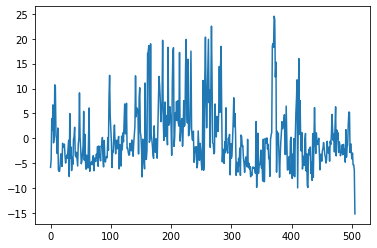

In [8]:
plt.plot(results.resid)

In [9]:
results.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


## Create Confidence(mean_ci) and prediction intervals(Obs_ci)


In the context of linear regression

- Confidence interval (mean_ci) at lstat = 5: if we calculated 100 of these intervals from different distribution of data, 95 of these intervals will have the population mean of the median price. Here population refers to all the cities that have lstat = 5


- Prediction interval (obs_ci_lower) at lstat = 5: if we calculate 100 of these intervals from different distributions of data, 95 of these intervals will have the  predicted median price within this interval for this lstat.

Note that confidence intervals are for the population mean and prediction interval are for a certain entitity

The below definition is in context of means, but also holds to linear regression coefficients too..

From graphpad

Confidence intervals tell you about how well you have determined the mean. Assume that the data really are randomly sampled from a Gaussian distribution. If you do this many times, and calculate a confidence interval of the mean from each sample, you'd expect about 95 % of those intervals to include the true value of the population mean. The key point is that the confidence interval tells you about the likely location of the true population parameter.

Prediction intervals tell you where you can expect to see the next data point sampled. Assume that the data really are randomly sampled from a Gaussian distribution. Collect a sample of data and calculate a prediction interval. Then sample one more value from the population. If you do this many times, you'd expect that next value to lie within that prediction interval in 95% of the samples.The key point is that the prediction interval tells you about the distribution of values, not the uncertainty in determining the population mean.

Prediction intervals must account for both the uncertainty in knowing the value of the population mean, plus data scatter. So a prediction interval is always wider than a confidence interval.

In [10]:
predictions = results.get_prediction(pd.DataFrame({"lstat": [5]}))
predictions.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513


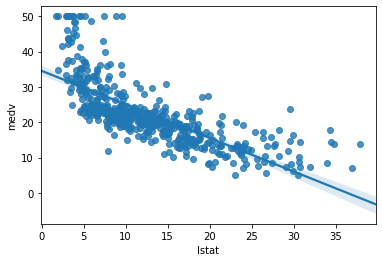

In [11]:
sns.regplot(boston["lstat"], boston["medv"])

Text(0.5, 0.98, 'Residual plot')

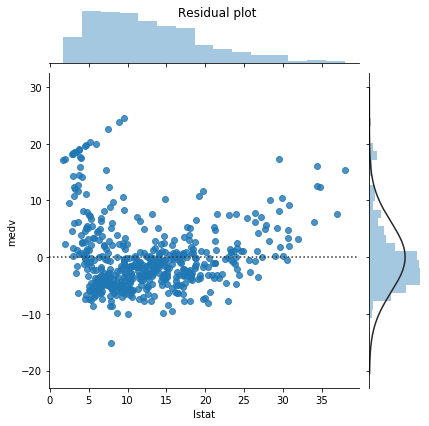

In [16]:
ax = sns.jointplot(boston["lstat"], boston["medv"], kind="resid")
ax.fig.suptitle('Residual plot')


Because the residual terms are not normal distributed, there seems to be some non-linearity in the model

## 3.6.3

In [17]:
results = smf.ols("medv ~ lstat+age", data=boston).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           2.98e-88
Time:                        12:25:10   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
all_cols = "+ ".join(boston.columns.drop('medv'))
results = smf.ols('medv ~ ' + all_cols, data=boston).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        12:36:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.6

In [ ]:
carseats = pd.read_csv(r"Data/Carseats.csv", index_col=0)
carseats.info()

In [ ]:
all_x = carseats.columns.to_list()
all_x.remove("Sales")

In [ ]:
results = smf.ols(
    "Sales ~ " + "+ ".join(all_x) + "+Income:Advertising + Price:Age", data=carseats
).fit()
results.summary()

In [ ]:
results.model.formula

In [ ]:
from patsy.contrasts import Treatment

levels = carseats["ShelveLoc"].unique()
contrast = Treatment(reference=0).code_without_intercept(levels=list(levels))
print(contrast.matrix)